## 5B: Identify and Remove Seasonality from Time Series Data with Python

**Time series datasets can contain a seasonal component.**
- This is a cycle that repeats over time, such as monthly or yearly. This repeating cycle
may obscure the signal that we wish to model when forecasting, and in turn may provide
a strong signal to our predictive models.

**Aim**: The definition of seasonality in time series and the opportunity it provides for forecasting
with machine learning methods.
- How to use the difference method to create a seasonally adjusted time series of daily temperature data.
- How to model the seasonal component directly and explicitly subtract it from observations.
- How to Identify and Remove Seasonality from Time Series Data with Python.

**Seasonality in Time Series**
Time series data may contain seasonal variation. _A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within
any fixed period._

### 1,2,3. Importing dataset and sampling data 

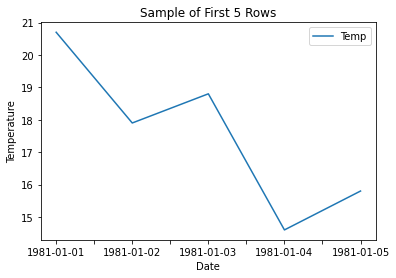

In [14]:
from pandas import read_csv
from matplotlib import pyplot

# Load the time series data
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# Take a sample of the first 5 rows
sample = series.head(5)

# Plot the sample data
sample.plot()
pyplot.title('Sample of First 5 Rows')
pyplot.xlabel('Date')
pyplot.ylabel('Temperature')
pyplot.show()


# The dataset shown strong seasonality component and it has a nice, fine-grained
# detail to work with.

### 3. Using the difference method on the daily data

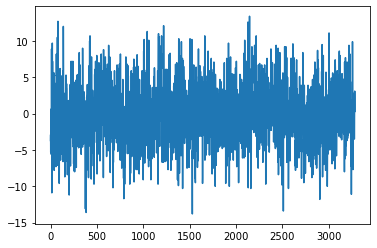

In [1]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

### 4. Normalize and preprocess

In [19]:
# Normalize the differences (optional)
mean_diff = sum(diff) / len(diff)
diff_normalized = [x - mean_diff for x in diff]
print(mean_diff)
print(diff_normalized)

Temp    0.014964
dtype: float64
[Temp   -1.160125
dtype: float64, Temp   -1.772106
dtype: float64, Temp    1.42052
dtype: float64, Temp   -0.90163
dtype: float64, Temp    0.078585
dtype: float64, Temp   -1.714964
dtype: float64, Temp   -2.950447
dtype: float64, Temp    0.649553
dtype: float64, Temp   -2.878297
dtype: float64, Temp   -0.556899
dtype: float64, Temp    0.581703
dtype: float64, Temp    0.05923
dtype: float64, Temp   -3.40206
dtype: float64, Temp    0.870751
dtype: float64, Temp    0.826972
dtype: float64, Temp   -0.888297
dtype: float64, Temp    0.517295
dtype: float64, Temp    0.97837
dtype: float64, Temp    2.233424
dtype: float64, Temp    0.788262
dtype: float64, Temp    1.915036
dtype: float64, Temp    0.752778
dtype: float64, Temp   -0.508297
dtype: float64, Temp    0.626972
dtype: float64, Temp    1.114069
dtype: float64, Temp   -1.877279
dtype: float64, Temp   -2.924641
dtype: float64, Temp    0.13837
dtype: float64, Temp   -2.018189
dtype: float64, Temp    1.115036

### 5. Resampling dataset

Resampling the dataset to a monthly average minimum temperature.

                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


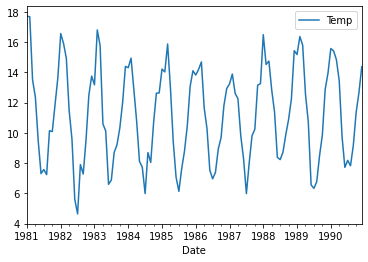

In [8]:
from pandas import read_csv, to_datetime
from matplotlib import pyplot

# Load the time series data and convert the index to datetime
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
series.index = to_datetime(series.index)

# Resample the dataset on a monthly basis
resample = series.resample('M')
monthly_mean = resample.mean()

# Print and plot the monthly mean values
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()


### 6. Test differencing method and seasonality

Test the same differencing method on the monthly data and confirm that the seasonally adjusted dataset does indeed remove the yearly cycles.

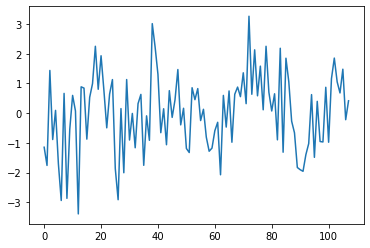

In [12]:
from pandas import read_csv
from matplotlib import pyplot
import pandas as pd

# Load the time series data and convert the index to datetime
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)

# Resample the dataset on a monthly basis
resample = series.resample('M')
monthly_mean = resample.mean()

# Calculate differences between the same month in the previous year
diff = list()
months_in_year = 12

for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    diff.append(value)

# Plot the differences
pyplot.plot(diff)
pyplot.show()


### 7. Use the monthly average minimum temperatures from the same month in the previous year to adjust the daily minimum temperature dataset.

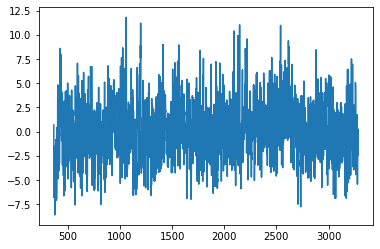

In [23]:
from pandas import read_csv
from matplotlib import pyplot

# Load the time series data and convert the index to datetime
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)

X = series.values
diff = list()
days_in_year = 365

for i in range(days_in_year, len(X)):
    # Extract year and month from the datetime index
    year_last_year = series.index[i - days_in_year].year
    month_last_year = series.index[i - days_in_year].month
    
    # Calculate the mean temperature for the same month in the previous year
    month_mean_last_year = series[(series.index.year == year_last_year - 1) & (series.index.month == month_last_year)].mean()
    
    # Calculate the difference
    value = X[i] - month_mean_last_year
    diff.append(value)

# Plot the differences
pyplot.plot(diff)
pyplot.show()


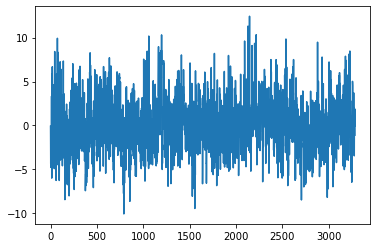

In [24]:
## Same as above

from pandas import read_csv
from matplotlib import pyplot

# Load the time series data and convert the index to datetime
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)

X = series.values
diff = list()
days_in_year = 365

# Define the window size for averaging (in days)
window_size = 7

for i in range(days_in_year, len(X)):
    # Calculate the date range for the previous year's window
    start_date = series.index[i - days_in_year] - pd.DateOffset(days=window_size)
    end_date = series.index[i - days_in_year] + pd.DateOffset(days=window_size)
    
    # Extract the data for the previous year's window
    window_data = series[start_date:end_date]
    
    # Calculate the mean temperature for the window
    window_mean_last_year = window_data.mean()
    
    # Calculate the difference
    value = X[i] - window_mean_last_year
    diff.append(value)

# Plot the differences
pyplot.plot(diff)
pyplot.show()


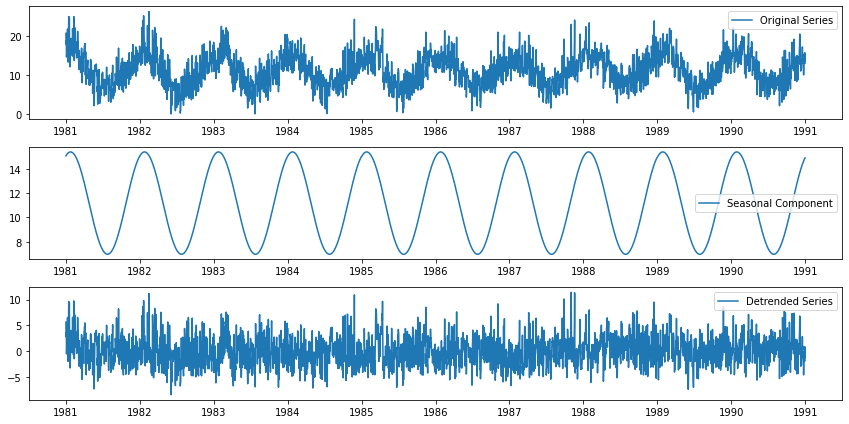

In [26]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from scipy.optimize import curve_fit

# Load the time series data and convert the index to datetime
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)

# Function to model the seasonal component using a sine wave
def sine_wave(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase) + offset

# Prepare the data for curve fitting
time_index = np.arange(1, len(series) + 1)  # Assuming 1-based index
observations = series.values.flatten()

# Fit the sine wave model to the data
initial_guess = (np.amax(observations), 1/365, 0, np.mean(observations))
params, _ = curve_fit(sine_wave, time_index, observations, p0=initial_guess)

# Generate the seasonal component using the fitted parameters
seasonal_component = sine_wave(time_index, *params)

# Subtract the seasonal component from the observations
detrended_series = observations - seasonal_component

# Plot the original series, seasonal component, and detrended series
pyplot.figure(figsize=(12, 6))
pyplot.subplot(3, 1, 1)
pyplot.plot(series.index, observations, label='Original Series')
pyplot.legend()

pyplot.subplot(3, 1, 2)
pyplot.plot(series.index, seasonal_component, label='Seasonal Component')
pyplot.legend()

pyplot.subplot(3, 1, 3)
pyplot.plot(series.index, detrended_series, label='Detrended Series')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()

### 8. Calculating Seasonal Component

Coefficients: [-7.94624922e-09  6.01679607e-06 -1.18089207e-03  3.39849069e-03
  1.83936348e+01]


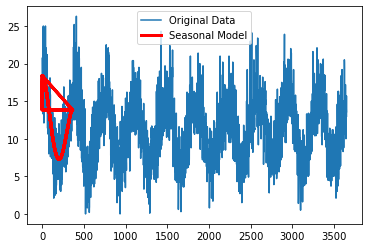

In [30]:
# My implementation
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

# Load the time series data and convert the index to datetime
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)

# Create X, excluding February 29 as it can't handle leap year
X = [i % 365 for i in range(len(series)) if series.index[i].month != 2 or series.index[i].day != 29]

# Create y for the subset of X
y = series.iloc[X].values.flatten()

degree = 4
coef = polyfit(X, y, degree)
print('Coefficients:', coef)

# Create curve for all days
curve = [sum(coef[d] * (i % 365)**(degree - d) for d in range(degree + 1)) for i in range(len(X))]

# Plot curve over original data
pyplot.plot(series.values, label='Original Data')
pyplot.plot(X, curve, color='red', linewidth=3, label='Seasonal Model')
pyplot.legend()
pyplot.show()


Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


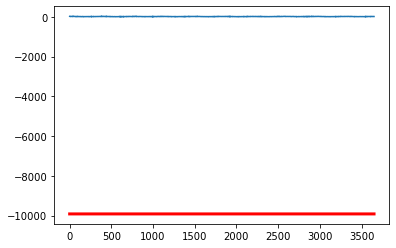

In [36]:
# Provided sample code

from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# plot curve over original data
pyplot.plot(series.values)

pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

### 9. Creating a seasonally adjeusted version of the dataset

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


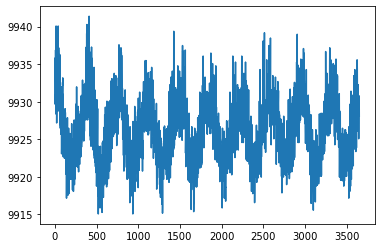

In [33]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# Fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i % 365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)

print('Coefficients:', coef)

# Create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i] ** (degree - d) * coef[d]
    curve.append(value)

# Create seasonally adjusted
values = series.values
diff = [values[i] - curve[i] for i in range(len(values))]

pyplot.plot(diff)
pyplot.show()
